In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv('HLTV_CSGO_results.csv', sep=';')
data.head()

,Unnamed: 0,match_url,match_id,team_A,team_B,score_tA,score_tB,competition,type_of_match
0,0,https://www.hltv.org/matches/2347942/havu-vs-b...,2347942,HAVU,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3
1,1,https://www.hltv.org/matches/2347941/complexit...,2347941,Complexity,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3
2,2,https://www.hltv.org/matches/2347940/dignitas-...,2347940,Dignitas,HAVU,1,2,FunSpark ULTI 2020 Europe Final,bo3
3,3,https://www.hltv.org/matches/2348267/caronte-v...,2348267,Caronte,PACT,19,17,Flashpoint 3 Open Qualifier 4,trn
4,4,https://www.hltv.org/matches/2348266/alternate...,2348266,ALTERNATE aTTaX,GamerLegion,14,16,Flashpoint 3 Open Qualifier 4,nuke


In [6]:
data = data.drop(axis=1, columns='Unnamed: 0')
data.head()

,match_url,match_id,team_A,team_B,score_tA,score_tB,competition,type_of_match
0,https://www.hltv.org/matches/2347942/havu-vs-b...,2347942,HAVU,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3
1,https://www.hltv.org/matches/2347941/complexit...,2347941,Complexity,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3
2,https://www.hltv.org/matches/2347940/dignitas-...,2347940,Dignitas,HAVU,1,2,FunSpark ULTI 2020 Europe Final,bo3
3,https://www.hltv.org/matches/2348267/caronte-v...,2348267,Caronte,PACT,19,17,Flashpoint 3 Open Qualifier 4,trn
4,https://www.hltv.org/matches/2348266/alternate...,2348266,ALTERNATE aTTaX,GamerLegion,14,16,Flashpoint 3 Open Qualifier 4,nuke


In [7]:
data.isnull().sum()

match_url        0
match_id         0
team_A           0
team_B           0
score_tA         0
score_tB         0
competition      0
type_of_match    0
dtype: int64

In [8]:
print(f'As dimensoes dos dados são: {data.shape}')
print(f'As colunas são {data.columns.values}')

As dimensoes dos dados são: (59539, 8)
As colunas são ['match_url' 'match_id' 'team_A' 'team_B' 'score_tA' 'score_tB'
 'competition' 'type_of_match']


In [9]:
print(f'Os times nesse dataset são: {data.team_A.unique().tolist()}')
print(f'Os campeonatos disponiveis nesse dataset são: {data.competition.unique().tolist()}')

Os times nesse dataset são: ['HAVU', 'Complexity', 'Dignitas', 'Caronte', 'ALTERNATE aTTaX', 'DenDD', 'MAD Lions', 'Chetz', 'SKADE', 'BLINK', 'Ambush', 'SAW', 'UMX', 'TYLOO', 'Young Ninjas', 'Invictus', 'Bears', 'Sharks', 'DETONA', 'Paquetá', 'Santos', 'Bravos', '777', 'Havan Liberty', 'MIBR', 'Cowana', 'Apeks', 'ENCE', 'ex-Winstrike', 'Izako Boars', 'GameAgents', 'Lyngby Vikings', 'NAVI Junior', 'ViCi', 'AGF', 'Isurus', 'los kogutos', 'Anonymo', 'CG', 'DBL PONEY', '1WIN', 'BIG', 'Virtus.pro', 'Trident', 'Fiend', 'Sprout', 'ORDER', 'LDLC', 'forZe', 'Dire Wolves', 'Renewal', 'Movistar Riders', 'Illuminar', 'mCon', 'Nemiga', 'PACT', 'K23', 'OFFSET', 'Galaxy Racer', 'Extra Salt', 'eSuba', 'Exsto', 'Endpoint', 'R!OT', 'M1 EDEN', 'Entropiq', 'Lilmix', 'D13', 'GAIJIN', 'Evil Geniuses', 'Chiefs', 'EC Kyiv', 'EC Brugge', 'Levitate', 'CLEANTmix', '100PG', 'FTW', 'Sangal', 'Simplicity', 'Nordavind', 'TPT', 'BBBMBCBS', 'Triumph', 'Veloz', 'Heroic', 'Familia', 'ATK', 'Brandbergen Shooters', 'G2', 

In [10]:
data.dtypes

match_url        object
match_id          int64
team_A           object
team_B           object
score_tA          int64
score_tB          int64
competition      object
type_of_match    object
dtype: object

In [11]:
campeonatos = data.groupby('competition').match_id.count().reset_index()
campeonatos = campeonatos.sort_values(by=['match_id'], ascending=False).reset_index()

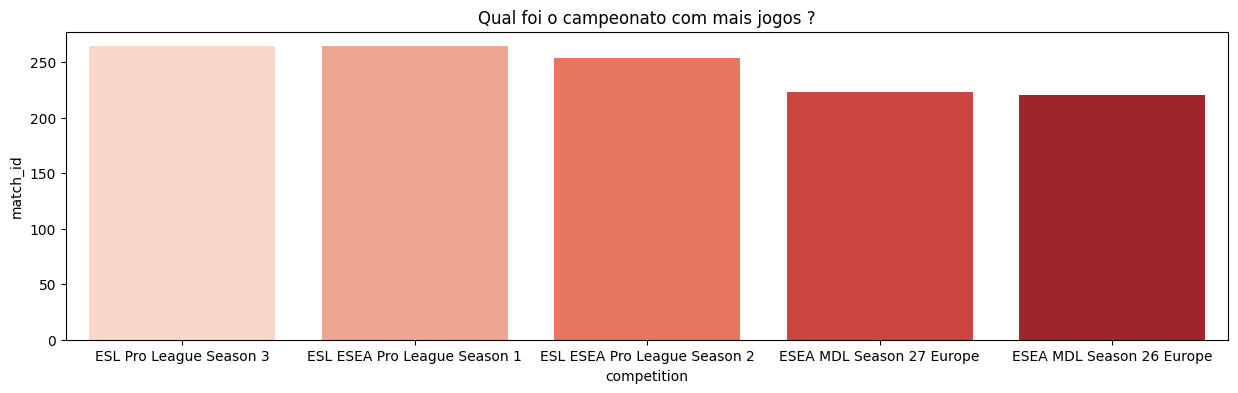

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(x='competition', y='match_id', data=campeonatos[:5], palette='Reds')
plt.title('Qual foi o campeonato com mais jogos ?')
plt.show()

In [13]:
maps = data.groupby('type_of_match').match_id.count().reset_index()
maps = maps.sort_values(by=['match_id'], ascending=False).reset_index()
linhas = ['bo2', 'bo3', 'bo5', '-']
for i in linhas:
    linhas_ao_dropar = maps.index[maps.eq(i).any(axis=1)]
    maps = maps.drop(linhas_ao_dropar)
maps.head(20)


,index,type_of_match,match_id
1,8,mrg,5688
2,7,inf,5232
3,13,trn,3277
4,6,d2,3166
5,5,cch,2962
6,10,ovp,2577
7,9,nuke,2510
8,4,cbl,1876
12,14,vtg,246
13,11,ssn,110


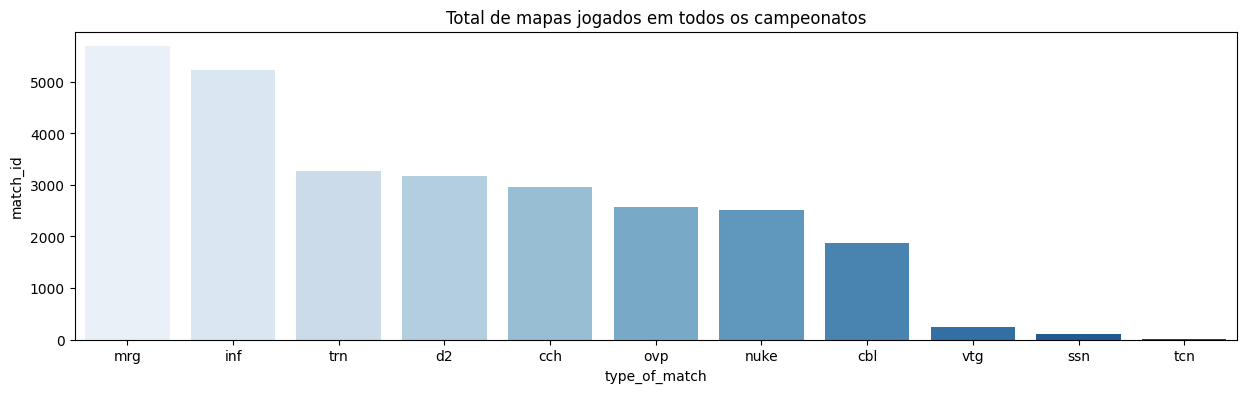

In [14]:
plt.figure(figsize=(15,4))
sns.barplot(x='type_of_match', y='match_id', data=maps, palette='Blues')
plt.title('Total de mapas jogados em todos os campeonatos')
plt.show()

In [19]:
tipo_de_partida = data['type_of_match']
data['map'] = tipo_de_partida
data.head(10)

,match_url,match_id,team_A,team_B,score_tA,score_tB,competition,type_of_match,map
0,https://www.hltv.org/matches/2347942/havu-vs-b...,2347942,HAVU,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3,bo3
1,https://www.hltv.org/matches/2347941/complexit...,2347941,Complexity,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3,bo3
2,https://www.hltv.org/matches/2347940/dignitas-...,2347940,Dignitas,HAVU,1,2,FunSpark ULTI 2020 Europe Final,bo3,bo3
3,https://www.hltv.org/matches/2348267/caronte-v...,2348267,Caronte,PACT,19,17,Flashpoint 3 Open Qualifier 4,trn,trn
4,https://www.hltv.org/matches/2348266/alternate...,2348266,ALTERNATE aTTaX,GamerLegion,14,16,Flashpoint 3 Open Qualifier 4,nuke,nuke
5,https://www.hltv.org/matches/2348265/dendd-vs-...,2348265,DenDD,OFFSET,16,10,Flashpoint 3 Open Qualifier 4,inf,inf
6,https://www.hltv.org/matches/2348263/mad-lions...,2348263,MAD Lions,TheDice,14,16,Flashpoint 3 Open Qualifier 4,nuke,nuke
7,https://www.hltv.org/matches/2348201/chetz-vs-...,2348201,Chetz,Max&BigGarlicDips,2,0,ESL Premiership Spring 2021 Powered by Intel,bo3,bo3
8,https://www.hltv.org/matches/2348262/skade-vs-...,2348262,SKADE,Illuminar,16,11,Flashpoint 3 Open Qualifier 4,mrg,mrg
9,https://www.hltv.org/matches/2348259/blink-vs-...,2348259,BLINK,ide na dol,14,16,Flashpoint 3 Open Qualifier 4,trn,trn


In [21]:
data.loc[~data['type_of_match'].isin(linhas), 'type_of_match'] = 'bo1'
data.head(10)

,match_url,match_id,team_A,team_B,score_tA,score_tB,competition,type_of_match,map
0,https://www.hltv.org/matches/2347942/havu-vs-b...,2347942,HAVU,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3,bo3
1,https://www.hltv.org/matches/2347941/complexit...,2347941,Complexity,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3,bo3
2,https://www.hltv.org/matches/2347940/dignitas-...,2347940,Dignitas,HAVU,1,2,FunSpark ULTI 2020 Europe Final,bo3,bo3
3,https://www.hltv.org/matches/2348267/caronte-v...,2348267,Caronte,PACT,19,17,Flashpoint 3 Open Qualifier 4,bo1,trn
4,https://www.hltv.org/matches/2348266/alternate...,2348266,ALTERNATE aTTaX,GamerLegion,14,16,Flashpoint 3 Open Qualifier 4,bo1,nuke
5,https://www.hltv.org/matches/2348265/dendd-vs-...,2348265,DenDD,OFFSET,16,10,Flashpoint 3 Open Qualifier 4,bo1,inf
6,https://www.hltv.org/matches/2348263/mad-lions...,2348263,MAD Lions,TheDice,14,16,Flashpoint 3 Open Qualifier 4,bo1,nuke
7,https://www.hltv.org/matches/2348201/chetz-vs-...,2348201,Chetz,Max&BigGarlicDips,2,0,ESL Premiership Spring 2021 Powered by Intel,bo3,bo3
8,https://www.hltv.org/matches/2348262/skade-vs-...,2348262,SKADE,Illuminar,16,11,Flashpoint 3 Open Qualifier 4,bo1,mrg
9,https://www.hltv.org/matches/2348259/blink-vs-...,2348259,BLINK,ide na dol,14,16,Flashpoint 3 Open Qualifier 4,bo1,trn


In [54]:
unique_maps = maps.type_of_match.unique().tolist()
data.loc[~data['map'].isin(unique_maps), 'map'] = '-'
data.sample(10)

,match_url,match_id,team_A,team_B,score_tA,score_tB,competition,type_of_match,map,match_outcome
53561,https://www.hltv.org/matches/2292779/natus-vin...,2292779,Natus Vincere,Dignitas,16,10,ESEA Invite Season 17 Europe,bo1,trn,team_A_wins
57824,https://www.hltv.org/matches/2244227/tcm-gamin...,2244227,TCM-Gaming,Hawks,2,0,SLTV StarSeries VI Qualifier,bo3,-,team_A_wins
41653,https://www.hltv.org/matches/2305214/ngse-vs-x...,2305214,nGse,XFXQ,1,1,WESG 2016 China Finals,bo2,-,draw
8301,https://www.hltv.org/matches/2339716/assassins...,2339716,Assassins,INTZ fe,16,9,GIRLGAMER World Finals 2020,bo1,inf,team_A_wins
43423,https://www.hltv.org/matches/2303382/chile-vs-...,2303382,Chile,Venezuela,2,1,World Championships 2016 South American Qualifier,bo3,-,team_A_wins
54745,https://www.hltv.org/matches/2291406/nip-vs-pl...,2291406,NIP,Playstar,16,1,ESPORTSM 2013/2014 - Qualifier #7,bo1,inf,team_A_wins
52600,https://www.hltv.org/matches/2293794/titan-vs-...,2293794,Titan,ESC,1,2,MLG X Games Championship Qualifier #2 Europe,bo3,-,team_B_wins
13466,https://www.hltv.org/matches/2334240/thunder-l...,2334240,Thunder Logic,Bushido Boyz,16,6,ESEA MDL Season 31 North America,bo1,d2,team_A_wins
15013,https://www.hltv.org/matches/2332741/furia-vs-...,2332741,FURIA,Luminosity,2,1,ESL One Cologne 2019 North America Open Qualif...,bo3,-,team_A_wins
53823,https://www.hltv.org/matches/2292488/united-ki...,2292488,United Kingdom,Malta,2,0,European Championship 2014 Qualification Round 2,bo3,-,team_A_wins


In [55]:
data['match_outcome'] = ''
data.loc[data['score_tA'] > data['score_tB'], 'match_outcome'] = 'team_A_wins'
data.loc[data['score_tA'] < data['score_tB'], 'match_outcome'] = 'team_B_wins'
data.loc[data['score_tA'] == data['score_tB'], 'match_outcome'] = 'draw'

data.head()


,match_url,match_id,team_A,team_B,score_tA,score_tB,competition,type_of_match,map,match_outcome
0,https://www.hltv.org/matches/2347942/havu-vs-b...,2347942,HAVU,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3,-,team_B_wins
1,https://www.hltv.org/matches/2347941/complexit...,2347941,Complexity,BIG,0,2,FunSpark ULTI 2020 Europe Final,bo3,-,team_B_wins
2,https://www.hltv.org/matches/2347940/dignitas-...,2347940,Dignitas,HAVU,1,2,FunSpark ULTI 2020 Europe Final,bo3,-,team_B_wins
3,https://www.hltv.org/matches/2348267/caronte-v...,2348267,Caronte,PACT,19,17,Flashpoint 3 Open Qualifier 4,bo1,trn,team_A_wins
4,https://www.hltv.org/matches/2348266/alternate...,2348266,ALTERNATE aTTaX,GamerLegion,14,16,Flashpoint 3 Open Qualifier 4,bo1,nuke,team_B_wins


In [57]:
data.to_csv('HLTV_CSGO_results_modified.csv')

In [62]:
from bs4 import BeautifulSoup
import requests

for i in data['match_url']:
    response = requests.get(i)
    soup = BeautifulSoup(response.content, 'html.parser')
    maps = soup.find_all('div',{'class': 'mapname'})
    break


[]
